In [12]:
import pandas as pd
from tld import get_tld, is_tld
from urllib.parse import urlparse
import whois
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle




In [60]:
data= pd.read_csv('D:\Final_out99.csv')


In [61]:
data

,Unnamed: 0.1,Unnamed: 0,final_url,type,url_len,@,?,-,=,.,...,path_length,query_length,is_legitimate,request_url_feature,anchor_url_feature,meta_script_link_feature,sfh_feature,domain_check,umap_values1,umap_values2
0,0,0,http://br-icloud.com.br,3,0.069307,0,0,1,0,2,...,0.000000,0.000000,0,0,0,0,0,0,-4.643196,27.281822
1,1,1,http://mp3raid.com/music/krizz_kaliko.html,0,0.163366,0,0,0,0,2,...,0.200000,0.000000,1,0,0,0,0,0,-11.611904,13.077092
2,2,2,http://bopsecrets.org/rexroth/cr/1.htm,0,0.143564,0,0,0,0,2,...,0.141667,0.000000,1,2,2,1,0,1,-11.861528,13.248561
3,3,3,http://www.garage-pirenne.be/index.php?option=...,1,0.391089,0,1,1,4,3,...,0.083333,0.355072,0,0,0,0,0,0,-6.431255,1.777216
4,5,5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,0.539604,0,0,16,0,2,...,0.833333,0.000000,1,0,0,0,0,0,0.712791,-8.399627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621734,640173,640173,http://xbox360.ign.com/objects/850/850402.html,3,0.183168,0,0,0,0,3,...,0.200000,0.000000,1,0,0,0,0,0,-7.585309,7.308740
621735,640174,640174,http://games.teamxbox.com/xbox-360/1860/Dead-S...,3,0.207921,0,0,2,0,2,...,0.216667,0.000000,0,0,0,0,0,0,23.409416,-6.731407
621736,640175,640175,https://www.gamespot.com/xbox360/action/deadsp...,3,0.202970,0,0,0,0,2,...,0.216667,0.000000,0,0,0,0,0,0,9.250283,-0.003783
621737,640176,640176,https://en.wikipedia.org/wiki/Dead_Space_(vide...,3,0.217822,0,0,0,0,2,...,0.241667,0.000000,1,0,0,0,2,1,9.215597,0.442518


In [4]:
data['url_len'] = data['final_url'].apply(lambda x: len(str(x)))

In [5]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['final_url'].apply(lambda i: i.count(a))

In [6]:
def getDomain(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return domain
    
data['domain'] = data['final_url'].apply(getDomain)

In [7]:
def shorteningService(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
data['shortening_service'] = data['final_url'].apply(shorteningService)

In [8]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
data['contains_ip_address'] = data['final_url'].apply(having_ip_address)

In [9]:
def count_dashes_in_hostname(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    return hostname.count('-')


data['- in hostname'] = data['final_url'].apply(count_dashes_in_hostname)

In [10]:
def count_numeric_chars(url):
    pattern = r'\d'
    return len(re.findall(pattern, url))


data['numeric in url'] = data['final_url'].apply(count_numeric_chars)

In [11]:
# check
def has_domains_in_subdomain(subdomain):
    pattern = r'[a-zA-Z0-9-]+\.[a-zA-Z]{2,}'
    domains = re.findall(pattern, subdomain)
    return int(len(domains) > 0)

data['domain_in_sub_domain'] = data['final_url'].apply(has_domains_in_subdomain)

In [12]:
# check
def has_domains_in_path(path):
    pattern = r'[a-zA-Z0-9-]+\.[a-zA-Z]{2,}'
    domains = re.findall(pattern, path)
    return int(len(domains) > 0)

data['domain_in_path'] = data['final_url'].apply(has_domains_in_path)

In [13]:

def has_https_in_domain(url):
    domain = urlparse(url).netloc
    return int(domain.startswith('https'))

data['https_in_domain'] = data['final_url'].apply(has_https_in_domain)

In [33]:
data

,final_url,type,url_len,@,?,-,=,.,#,%,...,",",//,domain,shortening_service,contains_ip_address,- in hostname,numeric in url,domain_in_sub_domain,domain_in_path,https_in_domain
0,http://br-icloud.com.br,phishing,23,0,0,1,0,2,0,0,...,0,1,br-icloud.com.br,0,0,1,0,1,1,0
1,http://mp3raid.com/music/krizz_kaliko.html,benign,42,0,0,0,0,2,0,0,...,0,1,mp3raid.com,0,0,0,1,1,1,0
2,http://bopsecrets.org/rexroth/cr/1.htm,benign,38,0,0,0,0,2,0,0,...,0,1,bopsecrets.org,0,0,0,1,1,1,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,1,4,3,0,0,...,0,1,www.garage-pirenne.be,0,0,1,7,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,1,3,2,0,0,...,0,1,adventure-nicaragua.net,0,0,1,22,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640173,http://xbox360.ign.com/objects/850/850402.html,phishing,46,0,0,0,0,3,0,0,...,0,1,xbox360.ign.com,0,0,0,12,1,1,0
640174,http://games.teamxbox.com/xbox-360/1860/Dead-S...,phishing,51,0,0,2,0,2,0,0,...,0,1,games.teamxbox.com,1,0,0,7,1,1,0
640175,https://www.gamespot.com/xbox360/action/deadsp...,phishing,50,0,0,0,0,2,0,0,...,0,1,www.gamespot.com,1,0,0,3,1,1,0
640176,https://en.wikipedia.org/wiki/Dead_Space_(vide...,phishing,53,0,0,0,0,2,0,0,...,0,1,en.wikipedia.org,0,0,0,0,1,1,0


In [14]:
def get_hostname_length(url):
    return len(urlparse(url).hostname)

# Apply function to create new column
data['hostname_length'] = data['final_url'].apply(lambda x: get_hostname_length(x))

In [15]:
def get_path_length(url):
    return len(urlparse(url).path)

# Apply function to create new column
data['path_length'] = data['final_url'].apply(lambda x: get_path_length(x))


In [16]:
def get_query_length(url):
    return len(urlparse(url).query)

# Apply function to create new column
data['query_length'] = data['final_url'].apply(lambda x: get_query_length(x))

In [17]:
data

,final_url,type,url_len,@,?,-,=,.,#,%,...,shortening_service,contains_ip_address,- in hostname,numeric in url,domain_in_sub_domain,domain_in_path,https_in_domain,hostname_length,path_length,query_length
0,http://br-icloud.com.br,phishing,23,0,0,1,0,2,0,0,...,0,0,1,0,1,1,0,16,0,0
1,http://mp3raid.com/music/krizz_kaliko.html,benign,42,0,0,0,0,2,0,0,...,0,0,0,1,1,1,0,11,24,0
2,http://bopsecrets.org/rexroth/cr/1.htm,benign,38,0,0,0,0,2,0,0,...,0,0,0,1,1,1,0,14,17,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,1,1,4,3,0,0,...,0,0,1,7,1,1,0,21,10,49
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1,1,3,2,0,0,...,0,0,1,22,1,1,0,23,10,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640173,http://xbox360.ign.com/objects/850/850402.html,phishing,46,0,0,0,0,3,0,0,...,0,0,0,12,1,1,0,15,24,0
640174,http://games.teamxbox.com/xbox-360/1860/Dead-S...,phishing,51,0,0,2,0,2,0,0,...,1,0,0,7,1,1,0,18,26,0
640175,https://www.gamespot.com/xbox360/action/deadsp...,phishing,50,0,0,0,0,2,0,0,...,1,0,0,3,1,1,0,16,26,0
640176,https://en.wikipedia.org/wiki/Dead_Space_(vide...,phishing,53,0,0,0,0,2,0,0,...,0,0,0,0,1,1,0,16,29,0


In [18]:
label_encoder = preprocessing.LabelEncoder()
  
data['type']= label_encoder.fit_transform(data['type'])
  

In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'final_url', 'type', 'url_len', '@', '?',
       '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//', 'domain',
       'shortening_service', 'contains_ip_address', 'numeric in url',
       'domain_in_sub_domain', 'domain_in_path', 'https_in_domain',
       'hostname_length', 'path_length', 'query_length', 'is_legitimate',
       'request_url_feature', 'anchor_url_feature', 'meta_script_link_feature',
       'sfh_feature', 'domain_check', 'umap_values1', 'umap_values2'],
      dtype='object')

In [20]:
data.to_csv('FINAL_URL2.csv')

In [14]:
x = data.drop(['domain','final_url','type','Unnamed: 0.1', 'Unnamed: 0','is_legitimate','umap_values1', 'umap_values2'],axis=1)
y = data['type']

# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, test_size=0.25, random_state=0)

In [15]:
from sklearn.utils import shuffle
data = shuffle(data)


In [16]:
data = shuffle(data)

In [51]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [52]:
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))


Confusion Matrix : 
 [[100898   2300    368   1444]
 [ 12446  11040      1    506]
 [  4649    348   3056     57]
 [ 21089    337    140   1366]]
Accuracy :  0.7270455184479365


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [48]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

KeyboardInterrupt: 

In [17]:

from sklearn.ensemble import RandomForestClassifier

# Split dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42) # 70-15 split

# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model on training data
rfc.fit(X_train, y_train)

# Predict on validation data
y_pred = rfc.predict(X_val)

# Evaluate model performance on validation set
accuracy = rfc.score(X_val, y_val)
print('Validation accuracy:', accuracy)

# Predict on test data
y_pred_test = rfc.predict(X_test)

# Evaluate model performance on test set
accuracy_test = rfc.score(X_test, y_test)
print('Test accuracy:', accuracy_test)


Validation accuracy: 0.8772597870492489
Test accuracy: 0.8771753466079069


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset

# Split dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42) # 70-15 split

# Create decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit model on training data
dtc.fit(X_train, y_train)

# Predict on validation data
y_pred = dtc.predict(X_val)

# Evaluate model performance on validation set
accuracy = dtc.score(X_val, y_val)
print('Validation accuracy:', accuracy)

# Predict on test data
y_pred_test = dtc.predict(X_test)

# Evaluate model performance on test set
accuracy_test = dtc.score(X_test, y_test)
print('Test accuracy:', accuracy_test)


Validation accuracy: 0.8657684578782421
Test accuracy: 0.8670061545190415


#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  84.98%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     61455
           1       0.72      0.73      0.73     13832
           2       0.86      0.89      0.88      4739
           3       0.73      0.73      0.73     13235

    accuracy                           0.85     93261
   macro avg       0.81      0.81      0.81     93261
weighted avg       0.85      0.85      0.85     93261

             Confusion_matrix 


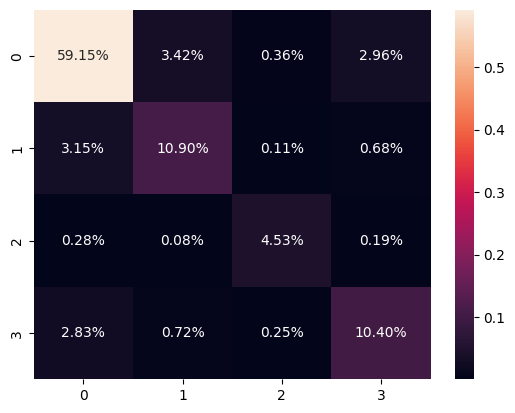

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  88.58%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     61455
           1       0.85      0.74      0.79     13832
           2       0.97      0.89      0.93      4739
           3       0.86      0.69      0.77     13235

    accuracy                           0.89     93261
   macro avg       0.89      0.82      0.85     93261
weighted avg       0.88      0.89      0.88     93261

             Confusion_matrix 


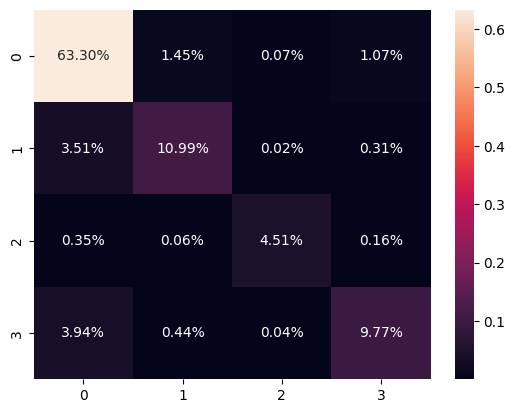

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  76.81%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     61455
           1       0.73      0.54      0.62     13832
           2       0.81      0.38      0.51      4739
           3       0.63      0.37      0.46     13235

    accuracy                           0.77     93261
   macro avg       0.74      0.56      0.61     93261
weighted avg       0.76      0.77      0.75     93261

             Confusion_matrix 


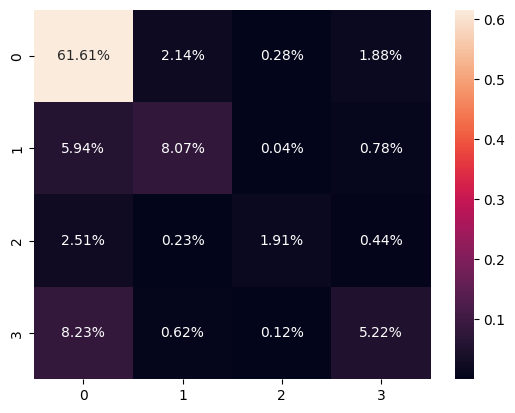

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42) # 70-15 split

models = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, SGDClassifier, ExtraTreesClassifier, GaussianNB]
accuracy_test = []
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


HTML JS BASED FEATURES --> HOST BASED FEATURES

In [1]:
import concurrent.futures
import pandas as pd
import requests
from bs4 import BeautifulSoup

def abnormal_features(url):
    redirect_feature_result = None
    check_status_bar_result = None
    check_right_click_result = None
    popup_feature_result = None
    check_iframe_result = None

    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        status_bar = soup.find('a').get('onmouseover')

        num_redirects = len(response.history)
        if num_redirects <= 1:
            redirect_feature_result = 2
        elif num_redirects >= 2 and num_redirects < 4:
            redirect_feature_result = 1
        else:
            redirect_feature_result = 0

        if status_bar and 'window.status' in status_bar.lower():
            check_status_bar_result = 0
        else:
            check_status_bar_result = 1

        script_tags = soup.find_all('script')
        for tag in script_tags:
            if 'event.button==2' in tag.text:
                check_right_click_result = 0
                break
        else:
            check_right_click_result = 1

        popup = soup.find('div', {'class': 'popup-window'})
        if popup is not None:
            text_fields = popup.find_all('input', {'type': 'text'})
            if len(text_fields) > 0:
                popup_feature_result = 0
            else:
                popup_feature_result = 1
        else:
            popup_feature_result = 1

        iframes = soup.find_all('iframe')
        for iframe in iframes:
            if 'frameborder' in iframe.attrs and iframe.attrs['frameborder'] == '0':
                check_iframe_result = 0
                break
        else:
            check_iframe_result = 1

    except:
        redirect_feature_result = 0
        check_status_bar_result = 0
        check_right_click_result = 0
        popup_feature_result = 0
        check_iframe_result = 0

    return (redirect_feature_result, check_status_bar_result, check_right_click_result, popup_feature_result, check_iframe_result)




In [ ]:

# create example dataframe
df = pd.read_csv('URLs.csv')
df = df.loc[0:5]

# create a ThreadPoolExecutor with 1000 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=1000) as executor:
    # apply the abnormal_features function to the final_url column using the executor
    futures = [executor.submit(abnormal_features, url) for url in df['final_url']]
    
    # retrieve the results from the futures as they complete
    results = [future.result() for future in concurrent.futures.as_completed(futures)]

# convert the list of tuples to a dataframe
df_features = pd.DataFrame(results, columns=['redirect_feature', 'check_status_bar', 'check_right_click', 'popup_feature', 'check_iframe'])

# concatenate original dataframe and new dataframe along the columns axis
df_concat = pd.concat([df.reset_index(drop=True), df_features.reset_index(drop=True)], axis=1)

# write concatenated dataframe to CSV file
df_concat.to_csv('test.csv', index=False)

BOOLEANS

In [6]:
# CHECK --> Don't think its that imp
import requests
from bs4 import BeautifulSoup

def has_insecure_form_actions(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        forms = soup.find_all('form')
        # print(forms)
        for form in forms:
            action = form.get('action')
            if action and not action.startswith('https'):
                return True
    except Exception as e:
        print(e)
    return False


has_insecure_form_actions('https://mail.google.com/mail/u/0/')

True

In [9]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def has_relative_form_actions(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        forms = soup.find_all('form')
        for form in forms:
            action = form.get('action')
            if action:
                parsed_url = urlparse(action)
                if not parsed_url.scheme and not parsed_url.netloc:
                    return True
    except Exception as e:
        print(e)
    return False

has_relative_form_actions('https://mail.google.com/mail/u/0/#inbox')

True

In [ ]:
# Check same as above

import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def has_relative_form_actions(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        forms = soup.find_all('form')
        for form in forms:
            action = form.get('action')
            if action:
                parsed_url = urlparse(action)
                if not parsed_url.scheme and not parsed_url.netloc:
                    return True
    except Exception as e:
        print(e)
    return False


In [11]:
# Working
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def has_external_form_actions(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        forms = soup.find_all('form')
        for form in forms:
            action = form.get('action')
            if action:
                parsed_url = urlparse(action)
                if parsed_url.netloc and parsed_url.netloc != urlparse(url).netloc:
                    return True
    except Exception as e:
        print(e)
    return False

has_external_form_actions('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

False

In [12]:
import requests
import re

def has_mouseover_fakeurl_javascript(url):
    try:
        response = requests.get(url)
        html = response.content.decode('utf-8')
        pattern = r"onmouseover\s*=\s*[\"'](?i)window\.status\s*=\s*'[^']*';\s*window\.setTimeout\(.*?\)\s*;?\s*[\"']"
        match = re.search(pattern, html)
        if match:
            return True
    except Exception as e:
        print(e)
    return False

has_mouseover_fakeurl_javascript('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

global flags not at the start of the expression at position 23


False

In [13]:
import requests
import re

def has_disable_right_click_javascript(url):
    try:
        response = requests.get(url)
        html = response.content.decode('utf-8')
        pattern = r"oncontextmenu\s*=\s*[\"']return\s+false;?[\"']"
        match = re.search(pattern, html)
        if match:
            return True
    except Exception as e:
        print(e)
    return False

has_disable_right_click_javascript('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

False

In [14]:
import requests
import re

def has_popup_window_javascript(url):
    try:
        response = requests.get(url)
        html = response.content.decode('utf-8')
        pattern = r"(?i)window\.open\s*\("
        match = re.search(pattern, html)
        if match:
            return True
    except Exception as e:
        print(e)
    return False

has_popup_window_javascript('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

False

In [15]:
import requests
import re

def has_mailto_link(url):
    try:
        response = requests.get(url)
        html = response.content.decode('utf-8')
        pattern = r"mailto:"
        match = re.search(pattern, html)
        if match:
            return True
    except Exception as e:
        print(e)
    return False

has_mailto_link('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

False

In [19]:
# Not working check

from bs4 import BeautifulSoup

def Iframe(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        iframes = soup.find_all('iframe')
        for iframe in iframes:
            if 'frameborder' in iframe.attrs and iframe.attrs['frameborder'] == '0':
                return 0
            else:
                return 1
    except Exception as e:
        print(e)

print(Iframe('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e'))

None


In [20]:
from bs4 import BeautifulSoup

def check_empty_title(html_code):
    soup = BeautifulSoup(html_code, 'html.parser')
    title = soup.find('title')
    if title is None:
        return False
    return len(title.text.strip()) == 0

check_empty_title('https://chat.openai.com/c/f7684c19-25dc-4cf0-b2d2-b16a6312406e')

C:\Users\tnish\AppData\Local\Temp\ipykernel_10460\169183276.py:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(html_code, 'html.parser')


False

In [22]:
import whois
import datetime

def get_domain_age(domain):
    creation_date = whois.whois(domain).creation_date
    if type(creation_date) is list:
        creation_date = creation_date[0]
    now = datetime.datetime.now()
    age_in_years = (now - creation_date).days / 365.25
    return age_in_years


get_domain_age('https://mail.google.com/mail/u/0/#search/maryam/FMfcgzGrcjWxRRcrlgTqGwFLvDNdFvjw?projector=1&messagePartId=0.1')


25.593429158110883

WITHOUT NORMALIZATION WITH UMAP

In [2]:
df= pd.read_csv("D:/UMAP/test/Test_urls.csv")

C:\Users\tnish\AppData\Local\Temp\ipykernel_1972\622390557.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("D:/UMAP/test/Test_urls.csv")


In [4]:
df

,Unnamed: 0,final_url,type,url_len,@,?,-,=,.,#,...,query_length,is_legitimate,request_url_feature,anchor_url_feature,meta_script_link_feature,sfh_feature,domain_check,Unnamed: 33,umap_values1,umap_values2
0,0,http://br-icloud.com.br,3,23,0,0,1,0,2,0,...,0,0,0,0,0,0,0,NaN,0.0,0.0
1,1,http://mp3raid.com/music/krizz_kaliko.html,0,42,0,0,0,0,2,0,...,0,1,0,0,0,0,0,NaN,0.0,0.0
2,2,http://bopsecrets.org/rexroth/cr/1.htm,0,38,0,0,0,0,2,0,...,0,1,2,2,1,0,1,NaN,0.0,0.0
3,3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,...,49,0,0,0,0,0,0,NaN,0.0,0.0
4,4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,...,194,0,0,0,0,0,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640173,640173,http://xbox360.ign.com/objects/850/850402.html,3,46,0,0,0,0,3,0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
640174,640174,http://games.teamxbox.com/xbox-360/1860/Dead-S...,3,51,0,0,2,0,2,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
640175,640175,https://www.gamespot.com/xbox360/action/deadsp...,3,50,0,0,0,0,2,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
640176,640176,https://en.wikipedia.org/wiki/Dead_Space_(vide...,3,53,0,0,0,0,2,0,...,0,1,0,0,0,2,1,NaN,NaN,NaN


In [5]:
df = df.drop(df[df['url_len'] >211].index)
df = df.drop(df[df['hostname_length'] >45].index)
df = df.drop(df[df['path_length'] >120].index)
df = df.drop(df[df['query_length'] >138].index)


In [6]:
df

,Unnamed: 0,final_url,type,url_len,@,?,-,=,.,#,...,query_length,is_legitimate,request_url_feature,anchor_url_feature,meta_script_link_feature,sfh_feature,domain_check,Unnamed: 33,umap_values1,umap_values2
0,0,http://br-icloud.com.br,3,23,0,0,1,0,2,0,...,0,0,0,0,0,0,0,NaN,0.0,0.0
1,1,http://mp3raid.com/music/krizz_kaliko.html,0,42,0,0,0,0,2,0,...,0,1,0,0,0,0,0,NaN,0.0,0.0
2,2,http://bopsecrets.org/rexroth/cr/1.htm,0,38,0,0,0,0,2,0,...,0,1,2,2,1,0,1,NaN,0.0,0.0
3,3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,...,49,0,0,0,0,0,0,NaN,0.0,0.0
5,5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,118,0,0,16,0,2,0,...,0,1,0,0,0,0,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640173,640173,http://xbox360.ign.com/objects/850/850402.html,3,46,0,0,0,0,3,0,...,0,1,0,0,0,0,0,NaN,NaN,NaN
640174,640174,http://games.teamxbox.com/xbox-360/1860/Dead-S...,3,51,0,0,2,0,2,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
640175,640175,https://www.gamespot.com/xbox360/action/deadsp...,3,50,0,0,0,0,2,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
640176,640176,https://en.wikipedia.org/wiki/Dead_Space_(vide...,3,53,0,0,0,0,2,0,...,0,1,0,0,0,2,1,NaN,NaN,NaN


In [16]:
df.to_csv("test1234567890.csv")

KeyboardInterrupt: 

In [98]:
data = pd.read_csv("C:/Users/tnish/Downloads/91percent.csv")

In [99]:
data.columns

Index(['final_url', 'type', 'url_len', '@', '?', '-', '=', '.', '#', '%', '+',
       '$', '!', '*', ',', '//', 'domain', 'shortening_service',
       'contains_ip_address', 'numeric in url', 'domain_in_sub_domain',
       'domain_in_path', 'https_in_domain', 'hostname_length', 'path_length',
       'query_length', 'is_legitimate', 'request_url_feature',
       'anchor_url_feature', 'meta_script_link_feature', 'sfh_feature',
       'domain_check', 'umap_values1', 'umap_values2'],
      dtype='object')

In [62]:

# create a MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# select the column to be normalized
column_to_normalize = df['url_len'].values.reshape(-1, 1)

# fit and transform the selected column to the range 0-1
normalized_column = scaler.fit_transform(column_to_normalize)

# replace the column in the original data with the normalized column
df['url_len'] = normalized_column.ravel()

In [63]:
column_to_normalize = df['hostname_length'].values.reshape(-1, 1)

# fit and transform the selected column to the range 0-1
normalized_column = scaler.fit_transform(column_to_normalize)

# replace the column in the original data with the normalized column
df['hostname_length'] = normalized_column.ravel()

In [64]:
column_to_normalize = df['path_length'].values.reshape(-1, 1)

# fit and transform the selected column to the range 0-1
normalized_column = scaler.fit_transform(column_to_normalize)

# replace the column in the original data with the normalized column
df['path_length'] = normalized_column.ravel()

In [65]:
column_to_normalize = df['query_length'].values.reshape(-1, 1)

# fit and transform the selected column to the range 0-1
normalized_column = scaler.fit_transform(column_to_normalize)

# replace the column in the original data with the normalized column
df['query_length'] = normalized_column.ravel()

In [90]:
data

,final_url,type,url_len,@,?,-,=,.,#,%,...,path_length,query_length,is_legitimate,request_url_feature,anchor_url_feature,meta_script_link_feature,sfh_feature,domain_check,umap_values1,umap_values2
608786,http://www.virieu.com/easypicture/,3,0.123762,0,0,0,0,2,0,0,...,0.108333,0.000000,1,0,0,0,0,1,-0.143670,-0.123440
549393,http://alpine-freeride.com/Wordpress/wp-conten...,0,0.371287,0,0,2,0,1,0,0,...,0.483333,0.000000,0,0,0,0,0,0,-0.011647,0.702875
222022,http://eaurega.speakerram.ru/2inf_startpage.ex...,2,0.287129,0,1,0,1,3,0,0,...,0.158333,0.137681,0,0,0,0,0,0,-0.162229,0.637730
355772,http://allbusiness.com/companyprofile/Kllc_Ali...,0,0.445545,0,0,1,0,2,0,0,...,0.641667,0.000000,1,0,0,0,0,0,0.383292,0.053364
210554,https://hockeyhermit.com/mike-bossy-jersey,0,0.163366,0,0,2,0,1,0,0,...,0.150000,0.000000,1,1,1,1,1,1,0.357792,0.400807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427900,https://businesswire.com/news/home/20110103005...,0,0.504950,0,0,5,0,1,0,0,...,0.725000,0.000000,1,0,0,0,0,0,-0.658694,0.246730
608505,http://home.datacomm.ch/zoffbred/poser3d.html,3,0.178218,0,0,0,0,3,0,0,...,0.183333,0.000000,0,0,0,0,0,0,0.343000,-0.046876
32065,http://www.harley-davidson-dijon.com/index.html,1,0.188119,0,0,2,0,3,0,0,...,0.091667,0.000000,1,1,1,1,2,1,-0.359321,0.316860
146739,http://enotes.com/topic/American_Indian_Movement,0,0.193069,0,0,0,0,1,0,0,...,0.258333,0.000000,1,0,0,0,0,0,0.212967,-0.388376


In [96]:

data = shuffle(data)
data = shuffle(data)


In [85]:
x=data.drop(['type','final_url','domain','@', '?','-','=','.','#','%','+','$','!','*',',','//'],axis=1)
y=data['type']

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data['umap_values1'] = scaler.fit_transform(data[['umap_values1']])

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data['umap_values2'] = scaler.fit_transform(data[['umap_values2']])

In [86]:
x

,url_len,shortening_service,contains_ip_address,numeric in url,domain_in_sub_domain,domain_in_path,https_in_domain,hostname_length,path_length,query_length,is_legitimate,request_url_feature,anchor_url_feature,meta_script_link_feature,sfh_feature,domain_check,umap_values1,umap_values2
608786,0.123762,0,0,0,1,1,0,0.279070,0.108333,0.000000,1,0,0,0,0,1,-0.952616,1.075340
549393,0.371287,0,0,19,1,1,0,0.395349,0.483333,0.000000,0,0,0,0,0,0,2.361788,23.671478
222022,0.287129,0,0,10,1,1,0,0.441860,0.158333,0.137681,0,0,0,0,0,0,-1.418542,21.890036
355772,0.445545,0,0,28,1,1,0,0.302326,0.641667,0.000000,1,0,0,0,0,0,12.276633,5.910150
210554,0.163366,1,0,0,1,1,0,0.325581,0.150000,0.000000,1,1,1,1,1,1,11.636451,15.411215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427900,0.504950,0,0,14,1,1,0,0.325581,0.725000,0.000000,1,0,0,0,0,0,-13.882146,11.197878
608505,0.178218,0,0,1,1,1,0,0.325581,0.183333,0.000000,0,0,0,0,0,0,11.265094,3.169022
32065,0.188119,0,0,0,1,1,0,0.627907,0.091667,0.000000,1,1,1,1,2,1,-6.366484,13.115635
146739,0.193069,0,0,0,1,1,0,0.186047,0.258333,0.000000,1,0,0,0,0,0,8.000669,-6.169526


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split the data into 80% training-validation and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# split the remaining 20% into 10% validation and 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# initialize the random forest classifier with 100 trees and random_state=42
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training-validation set
rf.fit(X_train_val, y_train_val)

# make predictions on the validation set
y_pred_val = rf.predict(X_val)

# calculate the accuracy of the model on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation accuracy:", accuracy_val)

# make predictions on the testing set
y_pred_test = rf.predict(X_test)

# calculate the accuracy of the model on the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing accuracy:", accuracy_test)

# make predictions on the training-validation set
y_pred_train_val = rf.predict(X_train_val)

# calculate the accuracy of the model on the training-validation set
accuracy_train_val = accuracy_score(y_train_val, y_pred_train_val)
print("Training-validation accuracy:", accuracy_train_val)


Validation accuracy: 0.9110443920223033
Testing accuracy: 0.91059595548026
Training-validation accuracy: 0.9999905388682215


In [45]:
data.isnull().sum()

Unnamed: 0.1                   0
Unnamed: 0                     0
final_url                      0
type                           0
url_len                        0
@                              0
?                              0
-                              0
=                              0
.                              0
#                              0
%                              0
+                              0
$                              0
!                              0
*                              0
,                              0
//                             0
domain                         0
shortening_service             0
contains_ip_address            0
numeric in url                 0
domain_in_sub_domain           0
domain_in_path                 0
https_in_domain                0
hostname_length                0
path_length                    0
query_length                   0
is_legitimate                  0
request_url_feature            0
anchor_url